In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import ttest_1samp
from scipy.stats import ttest_ind

C:\Users\admin\AppData\Local\Temp\ipykernel_7676\2242138055.py:4: DeprecationWarning: Please import `ttest_1samp` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import ttest_1samp


In [99]:
df = pd.read_csv(r"C:\Users\admin\Downloads\Screenshots\Sales.csv")

In [100]:
df.head()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.9480
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.0000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.5016
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.0000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.0000


In [51]:
df.tail()

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.0008
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.0000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.0000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.0000
3113,GIONEE,F9,Blue,3 GB,32 GB,Yes,4.2,7900,7900,GIONEE F9,0,0.0000


In [52]:
df.shape

(3114, 12)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [103]:
df.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320600
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836400
max,5.000000,179900.000000,189999.000000,75000.000000,70.610300


In [104]:
df.isna().sum()

Brands                   0
Models                   0
Colors                   0
Memory                  43
Storage                 39
Camera                   0
Rating                 144
Selling Price            0
Original Price           0
Mobile                   0
Discount                 0
discount percentage      0
dtype: int64

In [105]:
df['Memory'] = df['Memory'].fillna(df['Memory'].mode()[0])
df['Storage'] = df['Storage'].fillna(df['Storage'].mode()[0])
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [106]:
df.isna().sum()

Brands                 0
Models                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
Mobile                 0
Discount               0
discount percentage    0
dtype: int64

In [107]:
df.duplicated().sum()

118

In [108]:
df.drop_duplicates(inplace=True)

In [109]:
df.duplicated().sum()

0

In [110]:
df.columns.to_list()

['Brands',
 'Models',
 'Colors',
 'Memory',
 'Storage',
 'Camera',
 'Rating',
 'Selling Price',
 'Original Price',
 'Mobile',
 'Discount',
 'discount percentage']

In [111]:
df = df[['Brands',
 'Models',
 'Colors',
 #'Memory',
 #'Storage',
 #'Camera',
 'Rating',
 'Selling Price',
 #'Original Price',
 #'Mobile',
 #'Discount',
 'discount percentage']].copy()

In [112]:
df.columns

Index(['Brands', 'Models', 'Colors', 'Rating', 'Selling Price',
       'discount percentage'],
      dtype='object')

In [113]:
df = df.rename(columns={'discount percentage':'Discount_Percentage'})

In [114]:
df.describe()

,Rating,Selling Price,Discount_Percentage
count,2996.000000,2996.000000,2996.000000
mean,4.238284,25886.988985,6.117733
std,0.265337,29697.926393,11.198843
min,2.300000,1000.000000,-160.320600
25%,4.100000,9947.500000,0.000000
50%,4.300000,14999.000000,0.000000
75%,4.400000,27499.000000,9.836400
max,5.000000,179900.000000,70.610300


In [66]:
df.shape

(2996, 6)

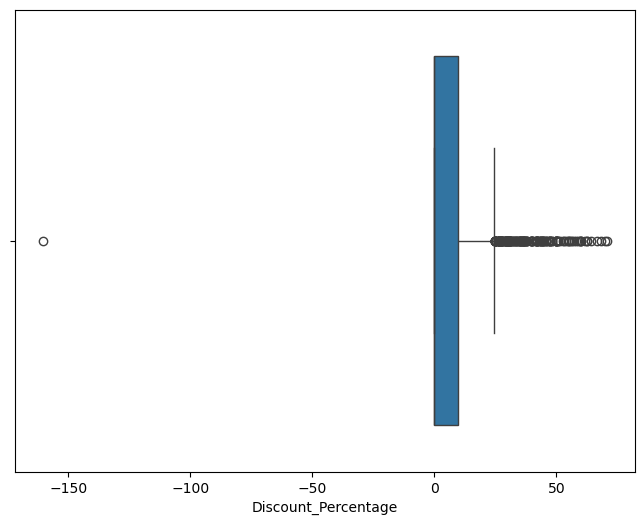

In [67]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Discount_Percentage'])
plt.show()

In [68]:
Q1 = df['Discount_Percentage'].quantile(0.25)
Q3 = df['Discount_Percentage'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - IQR * 1.5
upper_limit = Q3 + IQR * 1.5
df_cleaned = df[(df['Discount_Percentage'] >= lower_limit) & (df['Discount_Percentage'] <= upper_limit)]
print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_cleaned)}")

Original dataset size: 2996
Cleaned dataset size: 2800


In [69]:
df_cleaned

,Brands,Models,Colors,Rating,Selling Price,Discount_Percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,4.3,19330,7.9480
1,Nokia,3.2,Steel,3.8,10199,0.0000
2,realme,C2,Diamond Black,4.4,6999,12.5016
3,Infinix,Note 5,Ice Blue,4.2,12999,0.0000
4,Apple,iPhone 11,Black,4.6,49900,0.0000
...,...,...,...,...,...,...
3107,SAMSUNG,Galaxy S Duos 2,Black,4.0,5999,0.0000
3108,SAMSUNG,Metro 313,Black,4.2,2299,0.0000
3109,POCO,M4 Pro 5G,Cool Blue,4.4,16999,15.0008
3112,Apple,iPhone 13 Pro,Gold,4.3,119900,0.0000


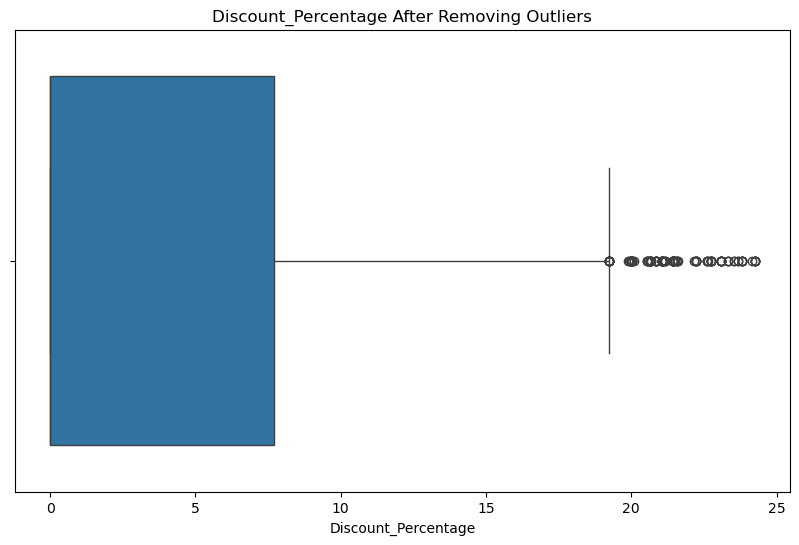

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Discount_Percentage'])
plt.title('Discount_Percentage After Removing Outliers')
plt.show()

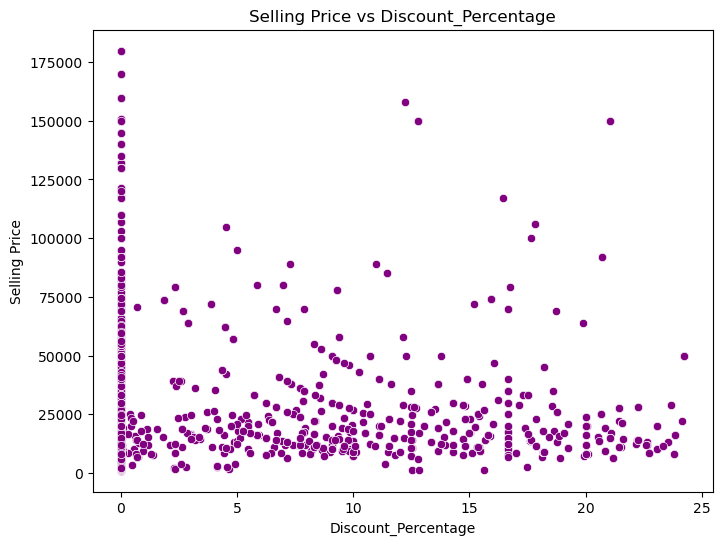

In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['Discount_Percentage'], y=df_cleaned['Selling Price'], color='purple')
plt.title('Selling Price vs Discount_Percentage')
plt.xlabel('Discount_Percentage')
plt.ylabel('Selling Price')
plt.show()

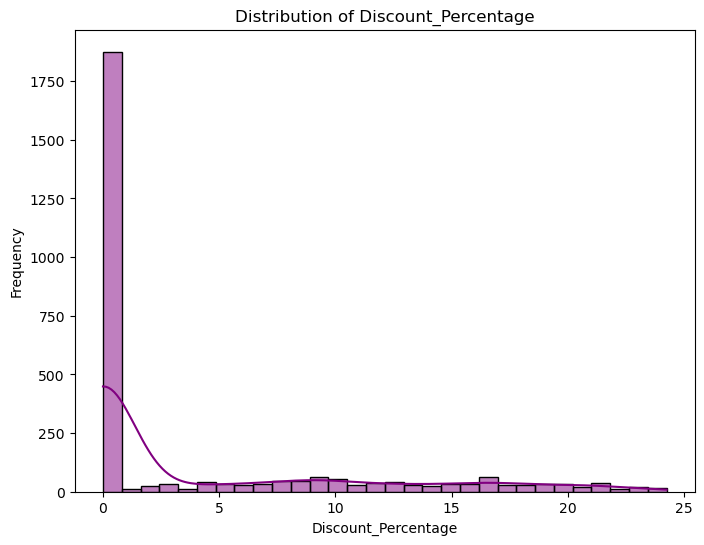

In [80]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Discount_Percentage'], kde=True, color='purple', bins=30)
plt.title('Distribution of Discount_Percentage')
plt.xlabel('Discount_Percentage')
plt.ylabel('Frequency')
plt.show()

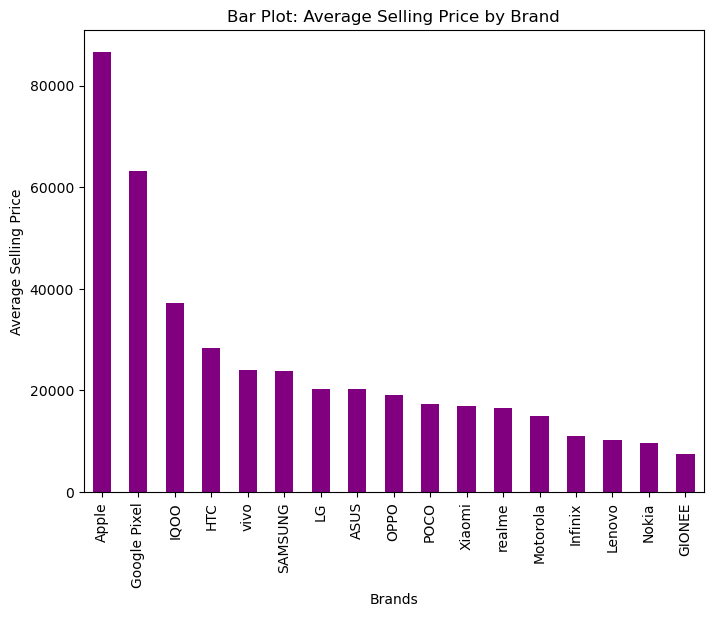

In [81]:
plt.figure(figsize=(8, 6))
brand_1 = df_cleaned.groupby('Brands')['Selling Price'].mean().sort_values(ascending=False)
brand_1.plot(kind='bar', color ='purple')
plt.title('Bar Plot: Average Selling Price by Brand')
plt.ylabel('Average Selling Price')
plt.show()

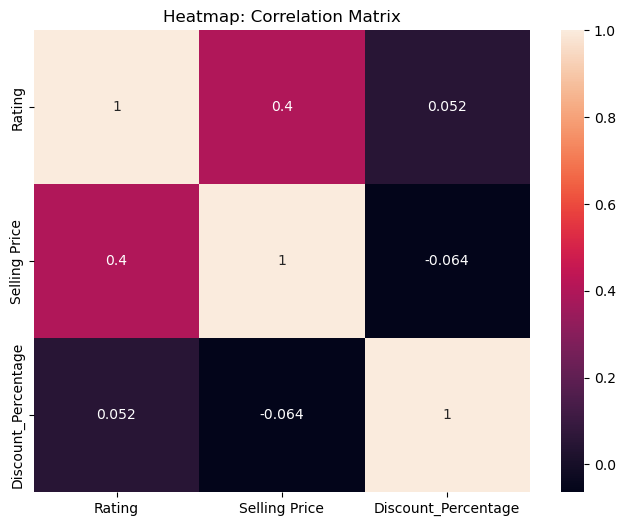

In [82]:
numerical_colns = ['Rating', 'Selling Price', 'Discount_Percentage']
correlation_matrix = df[numerical_colns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, color='purple')
plt.title('Heatmap: Correlation Matrix')
plt.show()

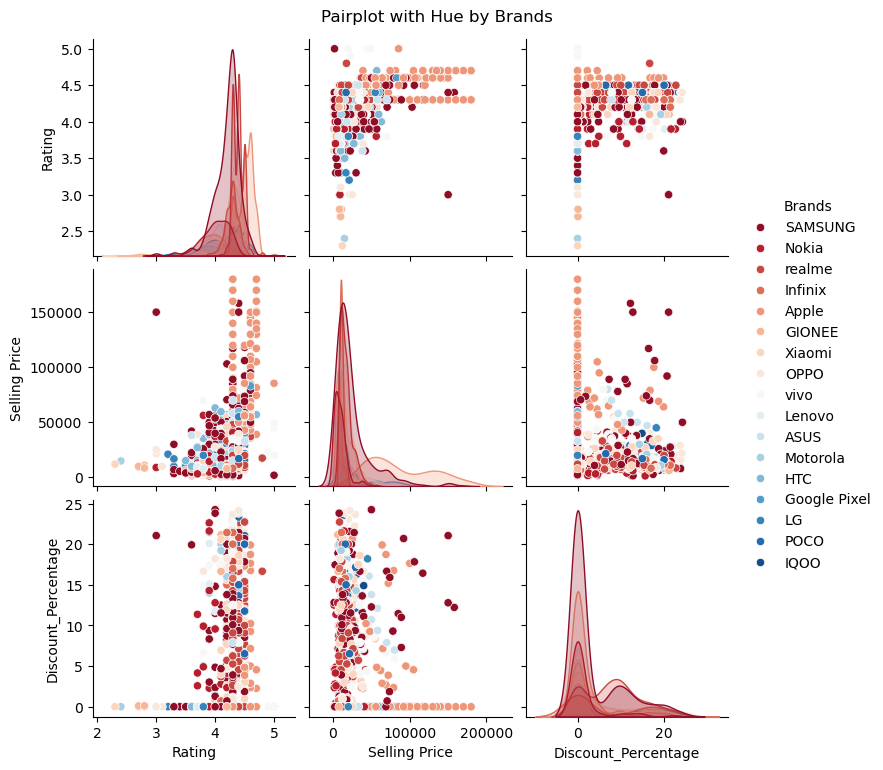

In [83]:
sns.pairplot(df_cleaned, diag_kind='kde', hue='Brands', palette='RdBu')
plt.suptitle('Pairplot with Hue by Brands', y=1.02)
plt.show()

# Two Sample Independent t test

In [92]:
median_discount = df_cleaned['Discount_Percentage'].median()

In [93]:
high_discount_rating =  df_cleaned[ df_cleaned['Discount_Percentage'] > median_discount]['Rating']
low_discount_rating =  df_cleaned[ df_cleaned['Discount_Percentage'] <= median_discount]['Rating']

In [94]:
t_stat, p_value = ttest_ind(high_discount_rating, low_discount_rating, equal_var=False)

In [95]:
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 12.866898005704945
P-Value: 8.065914972761666e-37


In [96]:
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in ratings between high and low discount groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ratings between the two groups.")

Reject the null hypothesis: There is a significant difference in ratings between high and low discount groups.


# One Sample t test

In [89]:
hypothesized_mean = 20
t_stat, p_value = ttest_1samp(df_cleaned['Discount_Percentage'], hypothesized_mean)

In [90]:
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -127.04582388838458
P-Value: 0.0


In [91]:
if p_value < 0.05:
    print("Reject the null hypothesis: The mean discount percentage is significantly different from 20%.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the mean discount percentage.")

Reject the null hypothesis: The mean discount percentage is significantly different from 20%.


In [118]:
df['Discount_Percentage'].median()

0.0

In [119]:
df['Selling Price'].median()

14999.0

In [120]:
high_discount_rating =  df_cleaned[ df_cleaned['Selling Price'] > median_discount]['Rating']
low_discount_rating =  df_cleaned[ df_cleaned['Selling Price'] <= median_discount]['Rating']

In [121]:
t_stat, p_value = ttest_ind(high_discount_rating, low_discount_rating, equal_var=False)

In [122]:
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: nan
P-Value: nan
